# Predictive

## Models preparation

In [39]:
# impor Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Display the tweet fully using:
pd.set_option('display.max_colwidth', None)
pd.set_option('max_colwidth', None)

In [40]:
#choose columns
fields = ['Tweet', 'Sentiment']
#read the two columns from the file and drop the null values
df = pd.read_csv('ClassifiedMatchDS.csv', skipinitialspace=True, usecols=fields).dropna()


In [41]:
#remove neutral rows, they wouldn't help
df=df[df['Sentiment']!='neutral']

#balance the data 
#check minimum class
min_class= min(len(df[df['Sentiment']=='positive']),len(df[df['Sentiment']=='negative']))
min_class

200

In [42]:
#random sample of data
p_sample=df[df['Sentiment']=='positive'].sample(n=min_class)
n_sample=df[df['Sentiment']=='negative'].sample(n=min_class)

In [43]:
#assign new balanced data to the dataframe
df=p_sample.append(n_sample).sample(frac=1).reset_index(drop=True)

In [44]:
#change sentiment values to numeric 
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})

In [45]:

#identfy the tweets and the lables
tweets= df['Tweet']
lables= df['Sentiment']

In [46]:
#Convert textual data to numeric form
tf_vec=TfidfVectorizer()
x=tf_vec.fit_transform(tweets)
x.shape


(400, 1581)

In [47]:

#Training phase
x_train,x_test, y_train, y_test= train_test_split(x, lables, test_size=0.3, random_state=0)

print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(280, 1581) (120, 1581) (280,) (120,)


## Model#1 [Logistic Regression]

In [48]:
# build the logistic regression classifier
# use the training data to train the estimator
classifier_log = LogisticRegression().fit(x_train,y_train)
print("LogisticRegression accuracy: %.2f" % classifier_log.score(x_test, y_test))


LogisticRegression accuracy: 0.71



Confusion matrix of the LogisticRegression classifier:
[[43  8]
 [27 42]]


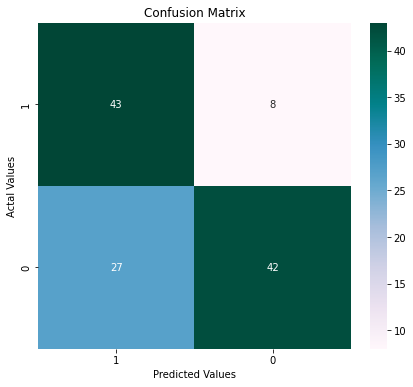

In [49]:
#print confusion matrix
#print confusion matrix
print("\nConfusion matrix of the LogisticRegression classifier:")
predicted_log = classifier_log.predict(x_test)
print(confusion_matrix(y_test,predicted_log))

cm = confusion_matrix(y_test,predicted_log)
cm_df = pd.DataFrame(cm,
                     index = ['1','0'], 
                     columns = ['1','0'])
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True, cmap='PuBuGn')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Text(0.5, 15.0, 'Predicted Values')

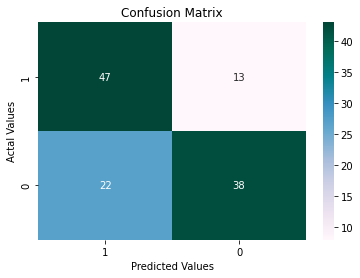

In [54]:
cf_matrix = pd.DataFrame(cm,
                     index = ['1','0'], 
                     columns = ['1','0'])
labels = [47,13,22,38]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, cmap='PuBuGn')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

In [20]:

#do a 10 fold cross-validation 
results_log = cross_val_score(classifier_log, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_log)


#calcuate the avrage accuracy
print("The average accuracy of the LogisticRegression classifier is : %.2f" % np.mean(results_log))


#print confusion matrix
print("\nConfusion matrix of the LogisticRegression classifier:")
predicted_log = classifier_log.predict(x_test)
print(confusion_matrix(y_test,predicted_log))


#print Classification report
print("\nClassification_report of LogisticRegression classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")


10-fold cross-validation:
[0.825 0.875 0.6   0.775 0.725 0.575 0.725 0.75  0.75  0.675]
The average accuracy of the LogisticRegression classifier is : 0.73

Confusion matrix of the LogisticRegression classifier:
[[37 20]
 [16 47]]

Classification_report of LogisticRegression classifier:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        57
           1       0.70      0.75      0.72        63

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120

----------------------------------------------------------------------------


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/num

In [12]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

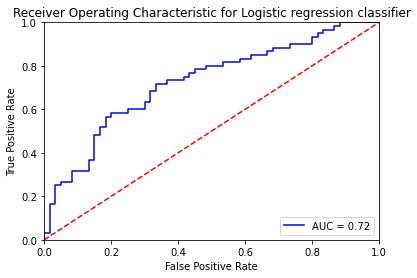

In [13]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logistic regression classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model#2 [Naïve Bayesian]

In [35]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(x_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(x_test.todense(), y_test))

MultinomialNB accuracy: 0.74


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [36]:
#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, x.todense(),lables, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

#calcuate the avrage accuracy
print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

#print confusion matrix
print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(x_test.todense())
print(confusion_matrix(y_test,predicted_nb))

#print Classification report
print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")



10-fold cross-validation:
[0.775 0.825 0.775 0.725 0.725 0.725 0.825 0.75  0.725 0.75 ]
The average accuracy of the MultinomialNB classifier is : 0.76

Confusion matrix of the MultinomialNB classifier:
[[47  5]
 [26 42]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        52
           1       0.89      0.62      0.73        68

    accuracy                           0.74       120
   macro avg       0.77      0.76      0.74       120
weighted avg       0.79      0.74      0.74       120

----------------------------------------------------------------------------


/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/raneemalrashoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/num

In [37]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_nb.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

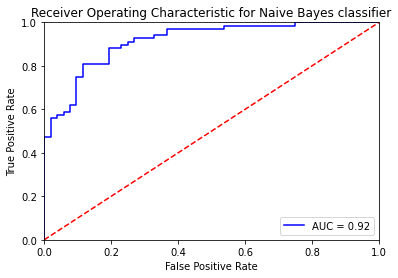

In [38]:
# polt AUC
plt.title('Receiver Operating Characteristic for Naive Bayes classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()